# TP2 - scaling, différences finies et méthode du gradient

In [3]:
%pylab inline

from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


# Exercice 1 - intérêt de la mise à l'échelle ("scaling") en optimisation

Considérons la fonction de deux variables réelles suivante :
$$
f_{M}(x,y) = (x-M)^4+(x-M)^2+\left(y-\dfrac{1}{M}\right)^4+\left(y-\dfrac{1}{M}\right)^2.
$$

+ En utilisant la fonction *minimize* de la bibliothèque *scipy.optimize*, chercher une solution approchée $(x^*,y^*)$ de la minimisation de cette fonction $f_{M}$ en partant du point $(1,1)$ et en utilisant l'option *Nelder-Mead*.
Observer ce qui se passe lorsque $M >> 1$, par exemple $M = 10^9$.

+ Ensuite, construire la fonction $f^S_M$ définie par 
$$
f^S_{M}(u,v) = f_M\left(Mu,\dfrac{v}{M}\right)
$$
et chercher une solution approchée $(u^*,v^*)$ de la minimisation de cette fonction $f^S_{M}$ en partant du point $\left(\dfrac{1}{M},M\right)$.

+ Comparer $(x^*,y^*)$ et $\left(M u^*,\dfrac{v^*}{M}\right)$.

Remarque : on ajoutera *options={'disp': True, 'maxiter':1000}* dans les appels à *minimize*.

In [8]:
def f(lx,M):
    x=lx[0]
    y=lx[1]
    dx=(x-M)
    dy=(y-1./M)
    return dx**4+dx**2+dy**4+dy**2

In [9]:
minimize(f,[1,1],args = (1000000000), method = 'Nelder-Mead',options={'disp':True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 260
         Function evaluations: 467


 final_simplex: (array([[ 1.00000000e+09,  1.29113993e-05],
       [ 1.00000000e+09,  1.56658634e-05],
       [ 1.00000000e+09, -4.61131628e-05]]), array([1.04070282e-09, 2.57632340e-09, 3.23270316e-09]))
           fun: 1.040702818408262e-09
       message: 'Optimization terminated successfully.'
          nfev: 467
           nit: 260
        status: 0
       success: True
             x: array([1.00000000e+09, 1.29113993e-05])

In [10]:
def fs(uv,M):
    u=uv[0]
    v=uv[1]
    dx=(M*u-M)
    dy=((v/M)-1./M)
    return dx**4+dx**2+dy**4+dy**2

In [11]:
minimize(fs,[1,1],args = (1000000000), method = 'Nelder-Mead',options={'disp':True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 61
         Function evaluations: 123


 final_simplex: (array([[1.        , 1.        ],
       [1.        , 0.99993768],
       [1.        , 1.00008789]]), array([0.00000000e+00, 3.88410854e-27, 7.72518106e-27]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 123
           nit: 61
        status: 0
       success: True
             x: array([1., 1.])

In [ ]:
EXPLICATION ?????

# Exercice 2 - approximation d'un gradient et d'une matrice hessienne par différences finies

On se rappelle qu'une approximation de la dérivée $f'(x)$ d'une fonction $f$ définie, continue et dérivable sur $\mathbb{R}$ est simplement, pour $h$ petit, 
$a_h := \dfrac{f(x+h)-f(x)}{h}.$
On a alors $|a_h-f'(x)| = O(h)$.

On généralise aisément cela au cas d'une fonction $f$ à valeurs réelles définie sur $\mathbb{R}^n$. En effet, si on note $e_i$ le $i$-ème vecteur de la base canonique de $\mathbb{R}^n$, la $i$-ème composante de $\nabla f(x)$ est approchée par
$$
\dfrac{f(x+he_i)-f(x)}{h}.
$$

De manière analogue, on peut approcher la composante $(i,j)$ de la matrice hessienne de $f$ en $x$ par 
$$
\dfrac{f(x+he_i+he_j)-f(x+he_i)-f(x+he_j)+f(x)}{h^2}.
$$

+ Ecrire une fonction **FDgrad(f,x,h)** qui calcule une approximation du gradient de la fonction $f$ au point $x$ en prenant un pas $h$.

+ Tester cette fonction pour une fonction $f$ dont vous connaissez le gradient (par exemple la fonction de Rosenbrock) et observez son comportement lorsque $h$ varie dans l'ensemble $\left\{10^{-k}, k = 1, 2, ... 16\right\}$. Pour ce faire, on pourra faire afficher l'erreur commise par rapport au gradient exact.

+ Ecrire une fonction **FDhess(f,x,h)** qui calcule une approximation de la matrice hessienne de la fonction $f$ au point $x$ en prenant un pas $h$.

+ Tester cette fonction pour une fonction $f$ dont vous connaissez la matrice hessienne et observez son comportement lorsque $h$ varie.

In [3]:
import numpy as np

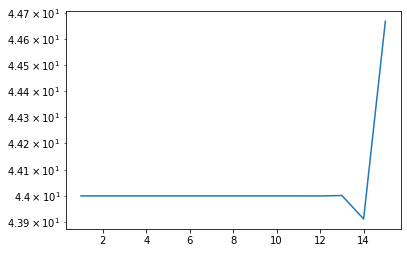

In [83]:
p = 10

def fRosenbrock(x) :
    x1 = x[0]
    x2 = x[1]
    return (p * (x1**2-x2)**2 + (1-x1)**2)

def dfRosenbrock(x) :
    x1 = x[0]
    x2 = x[1]
    m = np.zeros(2)
    m[0] = p * (4*x1)*(x1**2-x2) -2*(1-x1)
    m[1] = p * (-2) * (x1**2-x2)
    return m

def HessRosenbrock(x) :
    x1 = x[0]
    x2 = x[1]
    m = np.zeros([2,2])
    m[0][0] = p*(4*(x1**2-x2) + 4*x1) + 2 
    m[1][0] = -4*p*x1 
    m[0][1] = -4*p*x1
    m[1][1] = 2*p
    

def test(x):
    x1 = x[0]
    y2 = x[1]
    return(x1**2-y2**2)

def dtest(x):
    x1 = x[0]
    y2 = x[1]
    return([x1,-y2])

def FDgrad(f,x,h) :
    n = len(x)
    m = np.zeros(n)
    for i in range(0,n) :
        xx=x.copy()
        xx[i]=xx[i]+h
        calcul = (f(xx) - f(x))/h
        m[i] = (calcul)
    return(m)

def FDhess(f,x,h) :
    
    n = len(x)
    m = np.zeros([n,n])
    
    for i in range(0,n) :
        
        xx = x.copy()
        xx[i] += h
        
        for j in range(0,n):
            
            xxx = x.copy()
            xxxx = xx.copy()
            xxxx[j] += h
            xxx[j] += h
            calcul = (f(xxxx) - f(xx) - f(xxx) + f(x))/h**2
            m[i][j] = calcul
            
    return(m)
        
    
x = []
y = []
for i in range(1,16) :
    x.append(i)
    pas = (10**-i)
#     print("pas = ",pas)
    prediction = FDgrad(test,[2,1],pas)
    erreur = prediction[0] - 38 + prediction[1] -8
#     print("erreur commise : ", erreur,"\n")
    y.append(abs(erreur))

plot(x,y)
yscale('log')


In [67]:
from pylab import *
from matplotlib.pyplot import *

In [50]:
FDgrad(test,[2,1],0.001)

array([38.016002,  8.      ])

# Exercice 3 - méthode du gradient à pas fixe

Lorsqu'on cherche à minimiser une fonction $f$ définie sur $\mathbb{R}^n$, l'une des méthodes les plus élémentaires est la méthode de gradient. Elle consiste à construire une suite d'itérés $(x_k)_{k\in \mathbb{N}}$ de la manière suivante : partant d'un $x_0 \in \mathbb{R}^n$, pour tout $k \in \mathbb{N}$,
$$
x_{k+1} = x_k+\alpha_k d_k, \mbox{ avec } d_k = -\nabla f(x_k).
$$

Comme $d_k = -\nabla f(x_k)$ est une direction de descente ($\nabla f(x_k)^\top d_k < 0$), la suite ci-dessus fait nécessairement décroître $f$, quitte à prendre un pas constant $\alpha_k  = \alpha$ très petit.

+ Ecrire une fonction **GPF(x0,f,df,alpha,itmax)** qui fournit la suite décrite ci-dessus pour minimiser une fonction **f**, en partant du vecteur initial **x0** et en utilisant le pas fixe stocké dans **alpha**, sans faire plus de **itmax** itérations. L'argument **df** est le nom de la fonction qui calcule le gradient de **f**.

+ Pour mettre au point cette fonction, on commencera par faire un nombre fixe d'itérations et on la testera sur la fonction de Rosenbrock dont on connaît le minimum :
$$
p(x_1^2-x_2)^2+(1-x_1)^2.
$$
On pourra faire les essais avec $p = 10$.
Les points de départ standards pour cette fonction sont $(-1.2, 1)$ et $(6.39,-0.221)$.
Le temps de déboguer, on prendra **itmax** = 100, puis ensuite on le mettra à 1000.
Il faudra prendre le temps de choisir les pas fixes adaptés à chacun des deux points de départ.

Afin de constater que la méthode fonctionne, 
+ on fera un tracé des itérés construits, superposé aux contours de la fonction minimisée,
+ on fera un tracé en échelle logarithmique de la décroissance de la fonction $f$ en fonction des itérations.

[-1.2, 1.0] --> [0.0, 0.0]


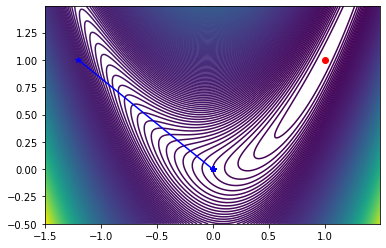

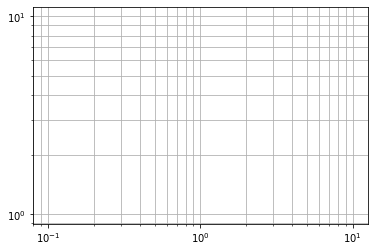

[6.39, -0.221] --> [0.0, 0.0]


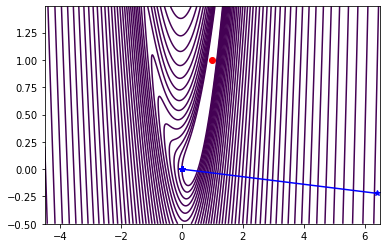

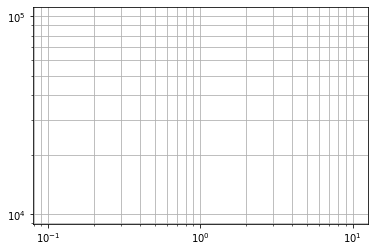

In [93]:
def GPF(x0,f,df,alpha,itmax):
    x = copy(x0)
    n = len(x)
    fval = zeros([n,itmax+1])
    iteres = zeros([n,itmax+1])
    iteres[:,0] = x
    fval[0] = f(x)
    for k in range(itmax):
        d = -df(x)
        if norm(-d <= 1.e-9):
            break
        xnew = x+alphad
        x = xnew
        iterest[:,k+1] = x
        fval[k+1] = f(x)
    return iteres, fval

x0 = array([[-1.2,1],[6.39,-0.221]])
alpha = [0.008,0.001]
itmax = 1000

i = 0
iteres, fval = GPF(x0[i,:],fRosenbrock,dfRosenbrock,alpha[i],itmax)
print(list(iteres[:,0]),'-->',list(iteres[:,-1]))
figure()
plot(iteres[0,:],iteres[1,:],'*b-')
plot([1],[1],'or')
xx = arange(-1.5,1.5,0.01)
yy = arange(-0.5,1.5,0.01)
x1, x2 = np.meshgrid(xx,yy)
Z = fRosenbrock([x1,x2])
contour(x1, x2, Z, 500)
figure()
loglog(fval,'b')
grid(True, which="both")
show()

i=1
iteres, fval = GPF(x0[i,:],fRosenbrock,dfRosenbrock,alpha[i],itmax)
print(list(iteres[:,0]),'-->',list(iteres[:,-1]))
figure()
plot(iteres[0,:],iteres[1,:],'*b-')
plot([1],[1],'or')
xx = arange(-4.5,6.5,0.01)
yy = arange(-0.5,1.5,0.01)
x1, x2 = np.meshgrid(xx,yy)
Z = fRosenbrock([x1,x2])
contour(x1, x2, Z, logspace(0,50,500))
figure()
loglog(fval,'b')
grid(True, which="both")
show()

In [76]:
x0 = array([[-1.2,1],[6.39,-0.221]])
x0[1,:]

array([ 6.39 , -0.221])

In [ ]:
def FDgrad(f,x,h) :
    n = len(x)
    m = np.zeros(n)
    for i in range(0,n) :
        xx=x.copy()
        xx[i]=xx[i]+h
        calcul = (f(xx) - f(x))/h
        m[i] = (calcul)
    return(m)

def GPF(x0,f,df,alpha,itmax) :
    for i in range(0,itmax) :
        for e in range(0,len(x0)):
            x0[e] -= df(f,x0,0.0001)
    return x0
    

[-1.2, 1.0] --> [0.0, 0.0]


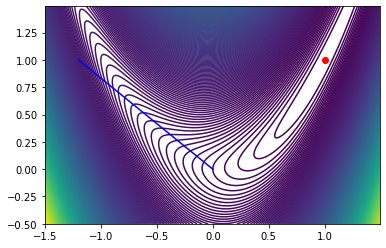

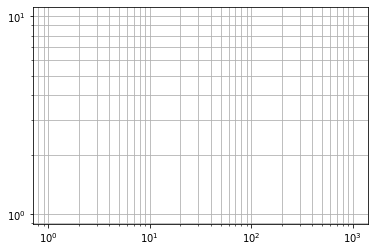

[6.39, -0.221] --> [0.0, 0.0]


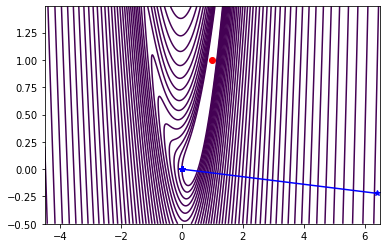

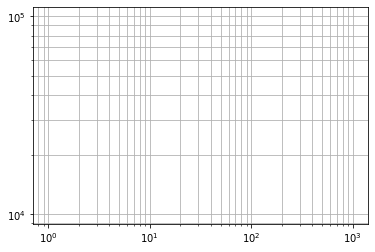

In [89]:
#Nouvelle question 3
def GPF(x0,f,df,alpha,itmax):
    x = copy(x0)
    n = len(x)
    iteres = zeros ([n,itmax+1])
    fval = zeros(itmax+1)
    iteres[:,0] = x
    fval[0] = f(x)
    for k in range(itmax) :
        d = -df(x)
        if norm(-d <= 1.e-9):
            break
        xnew = x+alphad
        x = xnew
        iterest[:,k+1] = x
        fval[k+1] = f(x)
    return iteres,fval

x0 = array([[-1.2,1],[6.39,-0.221]])
alpha = [0.008,0.001]
itmax = 1000

i = 0
iteres, fval = GPF(x0[i,:],fRosenbrock,dfRosenbrock,alpha[i],itmax)
print(list(iteres[:,0]),'-->',list(iteres[:,-1]))
figure()
plot(iteres[0,:],iteres[1,:],'b-')
plot([1],[1],'or')
xx = arange(-1.5,1.5,0.01)
yy = arange(-0.5,1.5,0.01)
x1, x2 = np.meshgrid(xx,yy)
Z = fRosenbrock([x1,x2])
contour(x1, x2, Z, 500)
figure()
loglog(fval,'b')
grid(True, which="both")
show()

i=1
iteres, fval = GPF(x0[i,:],fRosenbrock,dfRosenbrock,alpha[i],itmax)
print(list(iteres[:,0]),'-->',list(iteres[:,-1]))
figure()
plot(iteres[0,:],iteres[1,:],'*b-')
plot([1],[1],'or')
xx = arange(-4.5,6.5,0.01)
yy = arange(-0.5,1.5,0.01)
x1, x2 = np.meshgrid(xx,yy)
Z = fRosenbrock([x1,x2])
contour(x1, x2, Z, logspace(0,50,500))
figure()
loglog(fval,'b')
grid(True, which="both")
show()

# Exercice 4 - recherche linéaire d'Armijo

On a observé ci-dessus que le pas fixe n'est pas forcément très pratique. De fait, il est rarement utilisé en pratique.

On utilise plutôt une **recherche linéaire** pour trouver un pas $\alpha_k$ adapté à chaque itération. Par souci de simplicité, on décrit ici une recherche linéaire basée sur 
+ la règle d'Armijo : on cherche un pas $\alpha_k$ qui vérifie la condition de décroissance suffisante
$$
f(x_k+\alpha_k d_k) \leq f(x_k) + c_1 \alpha_k \nabla f(x_k)^\top d_k,
$$
avec $c_1 \in \left]0,\dfrac{1}{2}\right[$. Une valeur classique $c_1$ est $10^{-4}$ ; 
+ un "backtracking" : on cherche $\alpha_k$ parmi les $\left\{\dfrac{1}{\beta^k}, k \in\mathbb{N}\right\}$.

On se propose de coder l'algorithme de recherche linéaire suivant dans une fonction 
**RLA(xk,dk,alpha0,f,ps)** : étant donnés l'itéré courant $x_k$, la direction de descente $d_k$, la fonction $f$ à minimiser et le produit scalaire **ps** contenant $\nabla f(x_k)^\top d_k$, on initialise le pas $\alpha$ à $\alpha_0$, puis tant que la condition d'Armijo n'est pas satisfaite, on divise $\alpha$ par $2$. La fonction **RLA** doit retourner la valeur du pas ainsi obtenue.

In [99]:
def RLA(xk,dk,alpha0,f,ps) :
    cl = 1.0e-4
    alpha = alpha0
    fx = f(xk)
    while f(xk+alpha*dk) > fx +cl*alpha*ps:
        alpha = alpha/2.0
    return alpha

# Exercice 5 - méthode de gradient globalisé

A partir de la fonction GPF(x0,f,df,alpha,itmax), écrire une fonction **GRLA(x0,f,df,alpha0,itmax)** qui fournit la suite 
$$
x_{k+1} = x_k+\alpha_k d_k, \mbox{ avec } d_k = -\nabla f(x_k).
$$
pour minimiser une fonction **f**, en partant du vecteur initial **x0**, mais cette fois en utilisant la recherche linéaire d'Armijo codée ci-dessus, initialisée à **alpha0** pour ajuster le pas $\alpha_k$ à chaque itération. 

On fera les mêmes tests que dans l'exercice 3, en initialisant la recherche linéaire avec $\alpha_0 = 1$ et on ajoutera le tracé de l'évolution du pas $\alpha$ au cours des itérations.

[-1.2, 1.0] --> [0.9822206159249581, 0.9640354969591893]


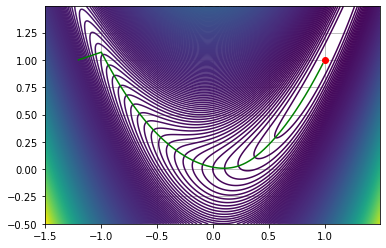

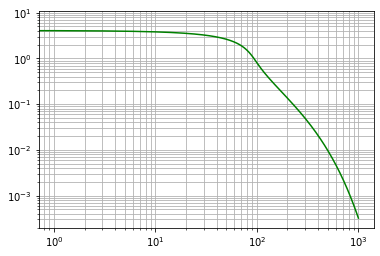

In [100]:
def GRLA(x0,f,df,alpha0,itmax):
    x = copy(x0)
    n = len(x)
    iteres = zeros([n,itmax+1])
    fval = zeros(itmax+1)
    alpha_vec = zeros(itmax)
    iteres[:,0] = x
    fval[0] = f(x)
    for k in range(itmax) :
        g = df(x)
        d = -g
        ps = dot(g,d)
        alpha = RLA(x,d,alpha0,f,ps)
        xnew = x+alpha*d
        x = xnew
        iteres[:,k+1] = x
        fval[k+1] = f(x)
        alpha_vec[k] = alpha
    return iteres,fval,alpha_vec

alpha0 = 1.0
itmax = 1000

i = 0
iteres, fval,alpha_vec = GRLA(x0[i,:],fRosenbrock,dfRosenbrock,alpha[i],itmax)
print(list(iteres[:,0]),'-->',list(iteres[:,-1]))
figure()
plot(iteres[0,:],iteres[1,:],'g-')
plot([1],[1],'or')
xx = arange(-1.5,1.5,0.01)
yy = arange(-0.5,1.5,0.01)
x1, x2 = np.meshgrid(xx,yy)
Z = fRosenbrock([x1,x2])
contour(x1, x2, Z, 500)
grid()
figure()
loglog(fval,'g')
grid(True, which="both")
show()


# Exercice 6 - amélioration des critères d'arrêt

Maintenant que la fonction **GRLA** est au point, on peut essayer de mettre en place des critères d'arrêt plus réalistes :  
$$
k > itmax, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(\nabla f(x_k))_i (x_{k+1})_i}{f(x_{k+1})}
\right| 
\leq \varepsilon_g, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(x_{k+1})_i-(x_{k})_i}{(x_{k+1})_i}
\right| 
\leq \varepsilon_x.
$$

Ainsi, à partir de GRLA(x0,f,df,alpha0,itmax), construire une fonction **GRLA2(x0,f,df,alpha0,itmax,epsilg,epsilx)** qui remplace la boucle *for* en une boucle *while* avec les critères d'arrêt indiqués ci-dessus.

Refaire les mêmes tests que précédemment, en commençant avec $\varepsilon_g = \varepsilon_x = 10^{-4}$.

Remarque : en pratique, pour éviter les problèmes lorsque l'un des $(x_{k+1})_i$ ou $f(x_{k+1})$ devient nuls, on utilise plutôt les tests robustes suivants : 
$$
k > itmax, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(\nabla f(x_k))_i \max\{|(x_{k+1})_i|,typx_i\}}{\max\{|f(x_{k+1})|,typf\}}
\right| 
\leq \varepsilon_g, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(x_{k+1})_i-(x_{k})_i}{\max\{|(x_{k+1})_i|,typx_i\}}
\right| 
\leq \varepsilon_x.
$$

In [ ]:
def GRLA2(x0,f,df,alpha0,itmax,epsilg,epsilx):
    x = copy(x0)
    n = len(x)
    iteres = zeros([n,itmax+1])
    fval = zeros(itmax+1)
    alpha_vec = zeros(itmax)
    iteres[:,0] = x
    fval[0] = f(x)
    k= 0
    cdt (l<itmax)
    while cdt and abbs((f)> 1.0e-9):
        g = df(x)
        d = -g
        ps = dot(g,d)
        alpha = RLA(x,d,alpha0,f,ps)
        xnew = x+alpha*d
        ecart = xnew-x
        x = xnew
        iteres[:,k+1] = x
        fx = f(x)
        fval[k+1] = f(x)
        alpha_vec[k] = alpha
        k+=1
        
        cdt1 = (k<itmax)
        aux2 = (g*x)/fx
        cdt2 = norm(g,ord = inf) > epsilg
        aux3 = ecart/x
        cdt3 = norm(ecart,ord=inf) > epsilx
        cdt = cdt1 and cdt2 and cdt3
    return iteres[:,0:k+1],fval[0:k+1],alpha_vec[0:k]

alpha0 = 1.0
itmax = 1000
epsilg = 1e-4
epsilx = 1e-4

i=0
ietres,fval,alpha_vec = GRLA2(x0[i,:],fRosenbrock,dfRosenbrock,alpha0,itmax,epsilg,epsilx)
print("Nb iter = ", len(iteres[0]))
print(iteres[:,0], '--->',iteres[:,-1])
figure()
plot(iteres[0,:],iteres[1,:],'*g-')
plot([1],[1],'or')
xx = arange(-1.5,1.5,0.01)
yy = arange(0.5,1.5,0.01)
x1,x2 = np.meshgrid(xx,yy)
Z = fRosenbrock([x1,x2])
contour(x1,x2,Z,500)
grid()
figure()
loglog(fval,'g')
grid(True,which = 'both')
figure